In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy


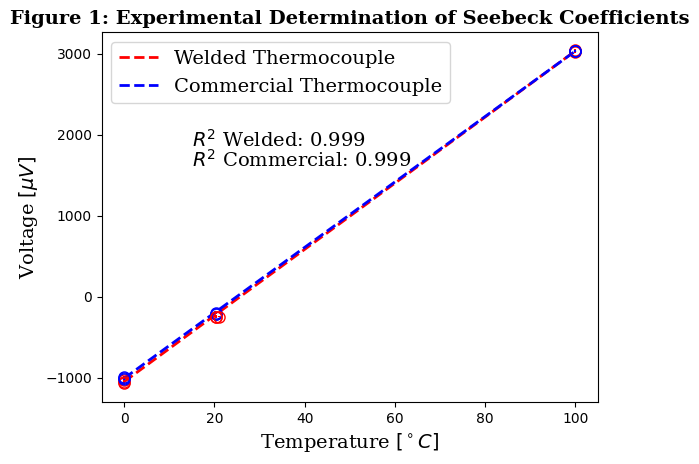

Commercial Seebeck Coefficient: 40.372166657774905
Welded Seebeck Coefficient: 40.81320341151732
Commercial Seebeck Error: 0.2819934494566567
Welded Seebeck Error: 0.34090555729406447


In [2]:
# Data paths
vch = [
    "./Data/Volt/Boiling Water/Trial 1 Commercial.csv",
    "./Data/Volt/Boiling Water/Trial 2 Commercial.csv",
    "./Data/Volt/Boiling Water/Trial 3 Commercial.csv",
]
vcc = [
    "./Data/Volt/Ice Water/Trial 1 Commercial.csv",
    "./Data/Volt/Ice Water/Trial 2 Commercial.csv",
    "./Data/Volt/Ice Water/Trial 3 Commercial.csv",
]
vca = [
    "./Data/Volt/Ambient/Trial 1 Commercial.csv",
    "./Data/Volt/Ambient/Trial 2 Commercial.csv",
    "./Data/Volt/Ambient/Trial 3 Commercial.csv",
]
vbh = [
    "./Data/Volt/Boiling Water/Trial 1 Built.csv",
    "./Data/Volt/Boiling Water/Trial 2 Built.csv",
    "./Data/Volt/Boiling Water/Trial 3 Built.csv",
]
vbc = [
    "./Data/Volt/Ice Water/Trial 1 Built.csv",
    "./Data/Volt/Ice Water/Trial 2 Built.csv",
    "./Data/Volt/Ice Water/Trial 3 Built.csv",
]
vba = [
    "./Data/Volt/Ambient/Trial 1 Built.csv",
    "./Data/Volt/Ambient/Trial 2 Built.csv",
    "./Data/Volt/Ambient/Trial 3 Built.csv",
]
ta = [
    "./Data/Temp/Ambient/Trial 1.csv",
    "./Data/Temp/Ambient/Trial 2.csv",
    "./Data/Temp/Ambient/Trial 3.csv",
]


# Ambient temp pairs
vca1 = np.loadtxt(vca[0], delimiter=",", skiprows=7, usecols=[2])
vca2 = np.loadtxt(vca[1], delimiter=",", skiprows=7, usecols=[2])
vca3 = np.loadtxt(vca[2], delimiter=",", skiprows=7, usecols=[2])

vba1 = np.loadtxt(vba[0], delimiter=",", skiprows=7, usecols=[2])
vba2 = np.loadtxt(vba[1], delimiter=",", skiprows=7, usecols=[2])
vba3 = np.loadtxt(vba[2], delimiter=",", skiprows=7, usecols=[2])

ta1 = np.loadtxt(ta[0], delimiter=",", skiprows=7, usecols=[2, 3])
ta2 = np.loadtxt(ta[1], delimiter=",", skiprows=7, usecols=[2, 3])
ta3 = np.loadtxt(ta[2], delimiter=",", skiprows=7, usecols=[2, 3])

# Hand built thermocouple Seebeck coefficient calculations
vbh1 = np.loadtxt(vbh[0], delimiter=",", skiprows=7, usecols=[2])
vbh2 = np.loadtxt(vbh[1], delimiter=",", skiprows=7, usecols=[2])
vbh3 = np.loadtxt(vbh[2], delimiter=",", skiprows=7, usecols=[2])

vbc1 = np.loadtxt(vbc[0], delimiter=",", skiprows=7, usecols=[2])
vbc2 = np.loadtxt(vbc[1], delimiter=",", skiprows=7, usecols=[2])
vbc3 = np.loadtxt(vbc[2], delimiter=",", skiprows=7, usecols=[2])

seebeck_coeff_built = np.polyfit(
    [0, 0, 0, 100, 100, 100],
    [vbc1.mean(), vbc2.mean(), vbc3.mean(), vbh1.mean(), vbh2.mean(), vbh3.mean()],
    deg=1,
)


def built_fit(T):
    return (T * seebeck_coeff_built[0]) + seebeck_coeff_built[1]


# Commercial thermocouple Seebeck coefficient calculations
vch1 = np.loadtxt(vch[0], delimiter=",", skiprows=7, usecols=[2])
vch2 = np.loadtxt(vch[1], delimiter=",", skiprows=7, usecols=[2])
vch3 = np.loadtxt(vch[2], delimiter=",", skiprows=7, usecols=[2])

vcc1 = np.loadtxt(vcc[0], delimiter=",", skiprows=7, usecols=[2])
vcc2 = np.loadtxt(vcc[1], delimiter=",", skiprows=7, usecols=[2])
vcc3 = np.loadtxt(vcc[2], delimiter=",", skiprows=7, usecols=[2])

seebeck_coeff_comm = np.polyfit(
    [0, 0, 0, 100, 100, 100],
    [vcc1.mean(), vcc2.mean(), vcc3.mean(), vch1.mean(), vch2.mean(), vch3.mean()],
    deg=1,
)


def comm_fit(T):
    return (T * seebeck_coeff_comm[0]) + seebeck_coeff_comm[1]


# Create curves for plotting fit line
temp = np.linspace(0, 100, 1000)
seebeck_curve_comm = comm_fit(temp)
seebeck_curve_built = built_fit(temp)


# Find Rsquared values
def r_squared(exper, fit):
    return np.corrcoef(exper, fit)[0, 1] ** 2


exper_built = [
    vbc1.mean(),
    vbc2.mean(),
    vbc3.mean(),
    vbh1.mean(),
    vbh2.mean(),
    vbh3.mean(),
]
fit_built = built_fit(np.array([0, 0, 0, 100, 100, 100]))
rsq_built = r_squared(exper_built, fit_built)

exper_comm = [
    vcc1.mean(),
    vcc2.mean(),
    vcc3.mean(),
    vch1.mean(),
    vch2.mean(),
    vch3.mean(),
]
fit_comm = comm_fit(np.array([0, 0, 0, 100, 100, 100]))
rsq_comm = r_squared(exper_comm, fit_comm)


# Plotting
font = dict(family="serif", size=14)
title = dict(family="serif", size=14, weight="bold")
comm_markers = dict(
    color="blue", linestyle="none", marker="o", markersize=8, fillstyle="none"
)
built_markers = dict(
    color="red", linestyle="none", marker="o", markersize=8, fillstyle="none"
)
comm_line = dict(color="blue", linestyle="--", linewidth=2)
built_line = dict(color="red", linestyle="--", linewidth=2)

plt.errorbar(
    [100, 100, 100],
    [vbh1.mean(), vbh2.mean(), vbh3.mean()],
    yerr=[2 * vbh1.std(), 2 * vbh2.std(), 2 * vbh3.std()],
    **built_markers,
)
plt.errorbar(
    [0, 0, 0],
    [vbc1.mean(), vbc2.mean(), vbc3.mean()],
    yerr=[2 * vbc1.std(), 2 * vbc2.std(), 2 * vbc3.std()],
    **built_markers,
)
plt.plot(temp, seebeck_curve_built, label="Welded Thermocouple", **built_line)

plt.errorbar(
    [100, 100, 100],
    [vch1.mean(), vch2.mean(), vch3.mean()],
    yerr=[2 * vch1.std(), 2 * vch2.std(), 2 * vch3.std()],
    **comm_markers,
)
plt.errorbar(
    [0, 0, 0],
    [vcc1.mean(), vcc2.mean(), vcc3.mean()],
    yerr=[2 * vcc1.std(), 2 * vcc2.std(), 2 * vcc3.std()],
    **comm_markers,
)
plt.plot(temp, seebeck_curve_comm, label="Commercial Thermocouple", **comm_line)

plt.errorbar(
    [ta1[:, 0].mean(), ta2[:, 0].mean(), ta3[:, 0].mean()],
    [vca1.mean(), vca2.mean(), vca3.mean()],
    yerr=[2 * vca1.std(), 2 * vca2.std(), 2 * vca3.std()],
    **comm_markers,
)
plt.errorbar(
    [ta1[:, 1].mean(), ta2[:, 1].mean(), ta3[:, 1].mean()],
    [vba1.mean(), vba2.mean(), vba3.mean()],
    yerr=[2 * vba1.std(), 2 * vba2.std(), 2 * vba3.std()],
    **built_markers,
)


plt.annotate(f"$R^2$ Commercial: {str(rsq_comm)[:5]}", (15, 1600), **font)
plt.annotate(f"$R^2$ Welded: {str(rsq_built)[:5]}", (15, 1850), **font)
plt.xlabel("Temperature $[^\circ C]$", **font)
plt.ylabel("Voltage $[\mu V]$", **font)
plt.title("Figure 1: Experimental Determination of Seebeck Coefficients", **title)
plt.legend(prop=font)
plt.show()

print(f"Commercial Seebeck Coefficient: {seebeck_coeff_comm[0]}")
print(f"Welded Seebeck Coefficient: {seebeck_coeff_built[0]}")

err_comm = abs(
    seebeck_coeff_comm[0]
    - (
        seebeck_coeff_comm[0]
        + (
            max([2 * vcc1.std(), 2 * vcc2.std(), 2 * vcc3.std()])
            + max([2 * vch1.std(), 2 * vch2.std(), 2 * vch3.std()])
        )
        / 100
    )
)

err_built = abs(
    seebeck_coeff_built[0]
    - (
        seebeck_coeff_built[0]
        + (
            max([2 * vbc1.std(), 2 * vbc2.std(), 2 * vbc3.std()])
            + max([2 * vbh1.std(), 2 * vbh2.std(), 2 * vbh3.std()])
        )
        / 100
    )
)

print(f"Commercial Seebeck Error: {err_comm}")
print(f"Welded Seebeck Error: {err_built}")


bead error 0.00012124429895722756
bead D 0.0027866
T0_1 18.10729


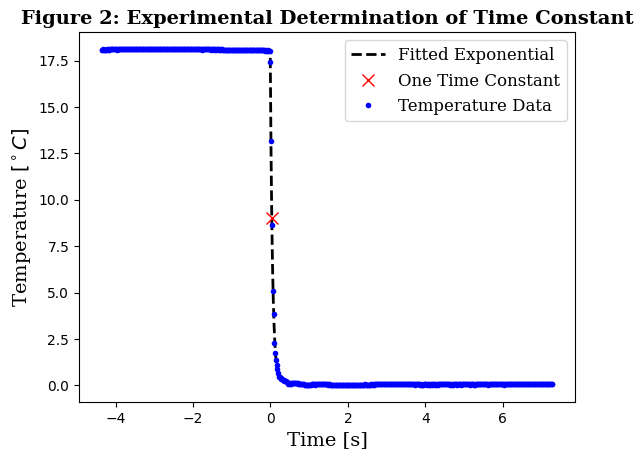

0.04943047723512955
0.008534264192430694
0.032350868888451574


In [3]:
# Data paths
t1r1 = [
    "./Data/EXP1.2 - TASK1/rate_1_trial_1.csv",
    "./Data/EXP1.2 - TASK1/rate_1_trial_2.csv",
    "./Data/EXP1.2 - TASK1/rate_1_trial_3.csv",
]
t1r2 = [
    "./Data/EXP1.2 - TASK1/rate_2_trial_1.csv",
    "./Data/EXP1.2 - TASK1/rate_2_trial_2.csv",
    "./Data/EXP1.2 - TASK1/rate_2_trial_3.csv",
]
t1r3 = [
    "./Data/EXP1.2 - TASK1/rate_3_trial_1.csv",
    "./Data/EXP1.2 - TASK1/rate_3_trial_2.csv",
    "./Data/EXP1.2 - TASK1/rate_3_trial_3.csv",
]

# Load data
drop1 = np.loadtxt(t1r2[0], delimiter=",", skiprows=7, usecols=[1, 2])
drop2 = np.loadtxt(t1r2[1], delimiter=",", skiprows=7, usecols=[1, 2])
drop3 = np.loadtxt(t1r2[2], delimiter=",", skiprows=7, usecols=[1, 2])

# Theoretical calculations
t_value = 3.182
bead_Derr = (np.array([1.3, 1.44, 1.44]) * (1/1000)).std() * (t_value / np.sqrt(3))
print(f"bead error {bead_Derr}")
bead_D = 1.3933 * (1 / 1000)
print(f"bead D {2 * bead_D}")

# Values for K cited from TABLE 1 of:
# Sundqvist, B. (1992).
# Thermal diffusivity and thermal conductivity of Chromel, Alumel, and Constantan in the range 100–450 K.
# Journal of Applied Physics, 72(2), 539–545.
# doi:10.1063/1.351885
K_chromel = 4.91 * 10**-6
K_alumel = 7.25 * 10**-6
K_avg = (K_chromel + K_alumel) / 2
tau_theory = (bead_D**2) / (K_avg * np.pi**2)

# Getting initial temp
T0_1 = drop1[:100, 1].mean()
T0_2 = drop2[:100, 1].mean()
T0_3 = drop3[:100, 1].mean()
print(f"T0_1 {T0_1}")


def T(t, T0, tau):
    return T0 * np.exp(-t / tau)


def fit_exp(t, y):
    y = np.log(y)
    K, A_log = np.polyfit(t, y, 1)
    A = np.exp(A_log)
    return A, K


def find_nearest(data, value):
    idx = (np.abs(data - value)).argmin()
    return idx


# Start and end of each temp drop trial
start_idx1 = np.diff(drop1[:, 1]).argmin() - 1
end_idx1 = start_idx1 + 10

start_idx2 = np.diff(drop2[:, 1]).argmin() - 1
end_idx2 = start_idx2 + 10

start_idx3 = np.diff(drop3[:, 1]).argmin() - 1
end_idx3 = start_idx3 + 10

t_exp1 = drop1[start_idx1:end_idx1, 0] - drop1[start_idx1, 0]
T_exp1 = drop1[start_idx1:end_idx1, 1]

t_exp2 = drop2[start_idx2:end_idx2, 0] - drop2[start_idx2, 0]
T_exp2 = drop2[start_idx2:end_idx2, 1]

t_exp3 = drop3[start_idx3:end_idx3, 0] - drop3[start_idx3, 0]
T_exp3 = drop3[start_idx3:end_idx3, 1]

# Exponential data fit for each trial
time = np.linspace(-0.005, 0.2, 1000)
A1, K1 = fit_exp(t_exp1, T_exp1)
A2, K2 = fit_exp(t_exp2, T_exp2)
A3, K3 = fit_exp(t_exp3, T_exp3)
drop1_fit = A1 * np.exp(K1 * time)
drop2_fit = A2 * np.exp(K2 * time)
drop3_fit = A3 * np.exp(K3 * time)

# Plot data, fitted curve and theoretical curve
font = dict(family="serif", size=14)
title = dict(family="serif", size=14, weight="bold")
line = dict(color="black", linestyle="--", linewidth=2)


tau_fit1 = time[find_nearest(drop1_fit, T0_1 / 2)] / np.log(2)
tau_fit2 = time[find_nearest(drop2_fit, T0_2 / 2)] / np.log(2)
tau_fit3 = time[find_nearest(drop3_fit, T0_3 / 2)] / np.log(2)
t_value = 3.182
tau_avg = (tau_fit1 + tau_fit2 + tau_fit3) / 3
tau_error = np.array([tau_fit1, tau_fit2, tau_fit3]).std() * (t_value / np.sqrt(3))

plt.plot(time, drop1_fit, label="Fitted Exponential", **line)
plt.plot(
    tau_fit1 * np.log(2),
    drop1_fit[find_nearest(drop1_fit, T0_1 / 2)],
    "rx",
    label="One Time Constant",
    markersize=8
)
plt.plot(
    drop1[:, 0] - drop1[start_idx1, 0], drop1[:, 1], "b.", label="Temperature Data"
)

plt.xlabel("Time [s]", **font)
plt.ylabel("Temperature $[^\circ C]$", **font)
plt.title("Figure 2: Experimental Determination of Time Constant", **title)
plt.legend(prop={"family": "serif", "size": 12})
plt.show()


print(tau_avg)
print(tau_error)
print(tau_theory)


In [4]:
# Load data
bp1 = np.loadtxt(
    "./Data/EXP1.2 - TASK2/hotT_trial1.csv", delimiter=",", skiprows=7, usecols=[2]
)
bp2 = np.loadtxt(
    "./Data/EXP1.2 - TASK2/hotT_trial2.csv", delimiter=",", skiprows=7, usecols=[2]
)
bp3 = np.loadtxt(
    "./Data/EXP1.2 - TASK2/hotT_trial3.csv", delimiter=",", skiprows=7, usecols=[2]
)

bp = np.array([bp1.mean(), bp2.mean(), bp3.mean()])
bp_mean = bp.mean()
bp_err = bp.std() * (t_value / np.sqrt(3))

# Value for Kb cited from TABLE 1 of:
# Hoyt, C. S., & Fink, C. K. (1937).
# The Constants of Ebullioscopy.
# The Journal of Physical Chemistry, 41(3), 453–456.
# doi:10.1021/j150381a010
Kb = 0.51
i = 2
delta_T = bp_mean - 100
m = delta_T / (i * Kb)
print(f"NaCl Concentration [mol salt / kg solvent]: {m}")
print(f"err {bp_err}")

max_error = np.array([bp1.std(), bp2.std(), bp3.std()]).max()
print(max_error)
t_value = 3.182
ci = max_error * (t_value / np.sqrt(3))
print(ci)


NaCl Concentration [mol salt / kg solvent]: 6.256602788671128
err 0.1145210424453708
0.0818296449441906
0.15033157750025186


In [5]:
# Data paths
t1r1 = [
    "./Data/EXP1.2 - TASK1/rate_1_trial_1.csv",
    "./Data/EXP1.2 - TASK1/rate_1_trial_2.csv",
    "./Data/EXP1.2 - TASK1/rate_1_trial_3.csv",
]
t1r2 = [
    "./Data/EXP1.2 - TASK1/rate_2_trial_1.csv",
    "./Data/EXP1.2 - TASK1/rate_2_trial_2.csv",
    "./Data/EXP1.2 - TASK1/rate_2_trial_3.csv",
]
t1r3 = [
    "./Data/EXP1.2 - TASK1/rate_3_trial_1.csv",
    "./Data/EXP1.2 - TASK1/rate_3_trial_2.csv",
    "./Data/EXP1.2 - TASK1/rate_3_trial_3.csv",
]

# Load data
rate1 = [
r1t1 := np.loadtxt(t1r1[0], delimiter=",", skiprows=7, usecols=[2]),
r1t2 := np.loadtxt(t1r1[1], delimiter=",", skiprows=7, usecols=[2]),
r1t3 := np.loadtxt(t1r1[2], delimiter=",", skiprows=7, usecols=[2])
]

rate2 = [
r2t1 := np.loadtxt(t1r2[0], delimiter=",", skiprows=7, usecols=[2]),
r2t2 := np.loadtxt(t1r2[1], delimiter=",", skiprows=7, usecols=[2]),
r2t3 := np.loadtxt(t1r2[2], delimiter=",", skiprows=7, usecols=[2])
]

rate3 = [
r3t1 := np.loadtxt(t1r3[0], delimiter=",", skiprows=7, usecols=[2]),
r3t2 := np.loadtxt(t1r3[1], delimiter=",", skiprows=7, usecols=[2]),
r3t3 := np.loadtxt(t1r3[2], delimiter=",", skiprows=7, usecols=[2])
]

avg1 = np.array([r1t1[125:].mean(), r1t2[125:].mean(), r1t3[125:].mean()]).mean()
dev1 = 2 * np.array([r1t1[125:].mean(), r1t2[125:].mean(), r1t3[125:].mean()]).std() 

avg2 = np.array([r2t1[400:].mean(), r2t2[400:].mean(), r2t3[400:].mean()]).mean()
dev2 = 2 * np.array([r2t1[400:].mean(), r2t2[400:].mean(), r2t3[400:].mean()]).std() 

avg3 = np.array([r3t1[10:].mean(), r3t2[10:].mean(), r3t3[10:].mean()]).mean()
dev3 = 2 * np.array([r3t1[10:].mean(), r3t2[10:].mean(), r3t3[10:].mean()]).std() 


print(f"rate 1:{avg1} C +- {dev1}")
print(f"rate 2:{avg2} C +- {dev2}")
print(f"rate 3:{avg3} C +- {dev3}")

rate 1:1.0534422695659929 C +- 1.6074496386155115
rate 2:-0.07021248628150305 C +- 0.18666271555146743
rate 3:-0.0451984126984127 C +- 0.09433676935268795
